<a href="https://colab.research.google.com/github/Kartikeya45/seam-carving/blob/main/seam_carving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEAM CARVING 

## Team:
- B L Siddhartha Bhat-200905010
- Kartikeya Angara - 200905038
- Yashas Kamath - 200905xxx
- Preetham M - 200905138

# Introduction

__Seam carving__ (or __liquid rescaling__) is an algorithm for content-aware image resizing, developed by Shai Avidan, of Mitsubishi Electric Research Laboratories (MERL), and Ariel Shamir, of the Interdisciplinary Center and MERL. It functions by establishing a number of seams (paths of least importance) in an image and automatically removes seams to reduce image size or inserts seams to extend it. Seam carving also allows manually defining areas in which pixels may not be modified, and features the ability to remove whole objects from photographs.

The purpose of the algorithm is image retargeting, which is the problem of displaying images without distortion on media of various sizes (cell phones, projection screens) using document standards, like HTML, that already support dynamic changes in page layout and text but not images.

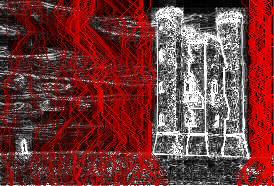

In [1]:
!git clone https://github.com/Kartikeya45/seam-carving.git
%cd ./seam-carving

Cloning into 'seam-carving'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 232 (delta 94), reused 196 (delta 60), pack-reused 0
Receiving objects: 100% (232/232), 13.88 MiB | 20.51 MiB/s, done.
Resolving deltas: 100% (94/94), done.
/content/seam-carving


## Read .pnm files and matrix

In [2]:
from PIL import Image
import numpy as np
def show_pnm(file_name):
    with open(file_name, 'r') as f:
        vals = f.read().split()
        w = int(vals[1])
        h = int(vals[2])
        if vals[0] == 'P2': # Grayscale
            pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
        elif vals[0] == 'P3': # RGB
            pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
        else:
            return None

    return Image.fromarray(pixels)

def show_matrix(matrix_file):
    '''
    input: filename
    output: show matrix

    Each element on the same line is sperated by a space
    '''
    m = np.loadtxt(matrix_file)
    m = m + m.min()
    m = m / m.max()
    m = m * 255
    m = m.astype(np.uint8)
    return Image.fromarray(m)

## Compile

In [3]:
!nvcc -rdc=true ./main.cu ./src/*/* -o ./result/exe/seamCarving

## Args:
- The excution file will appear in __./result/exe__
- <mark>arg[0]</mark> ./result/exe/seamCarving
- <mark>arg[1]</mark> an input file (see ./images)
- <mark>arg[2]</mark> name of the output file with no extension (there will be 2 file _host and _device in ../result/)
- <mark>arg[3]</mark> new width 
- <mark>arg[1]</mark> blocksize.x
- <mark>arg[1]</mark> blocksize.y

## Broadcast tower image

In [4]:
!./result/exe/seamCarving ./images/broadcast_tower.pnm ./result/broadcast_tower 150

Image size (width x height): 274 x 186

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host: 417.015778 ms

Processing time of device: 145.736542 ms

Error between device result and host result: : 0.000000


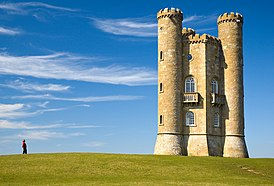

In [5]:
show_pnm('./images/broadcast_tower.pnm')

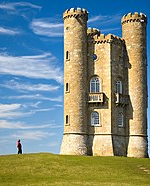

In [6]:
show_pnm('./result/broadcast_tower_host.pnm')

## Clock image

In [25]:
!./result/exe/seamCarving ./images/clock.pnm ./result/clock 300

Image size (width x height): 788 x 599

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host: 3364.936279 ms

Processing time of device: 662.328430 ms

Error between device result and host result: : 2.609967


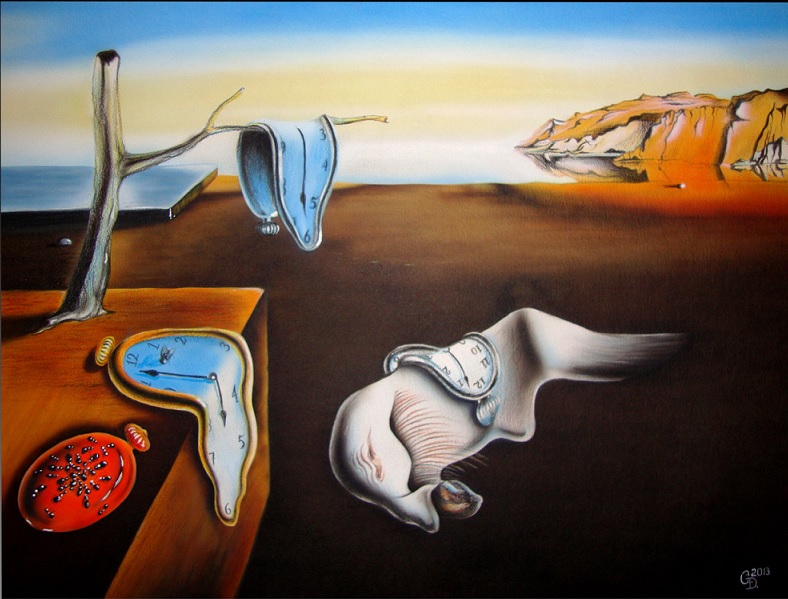

In [26]:
show_pnm('./images/clock.pnm')

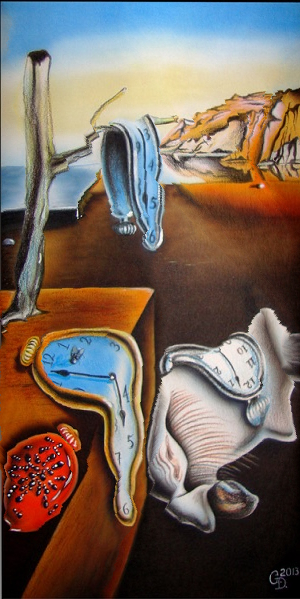

In [27]:
show_pnm('./result/clock_device.pnm')

## Cat image

In [10]:
!./result/exe/seamCarving ./images/cat.pnm ./result/cat 150

Image size (width x height): 240 x 320

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host: 110.488480 ms

Processing time of device: 36.446560 ms

Error between device result and host result: : 0.000000


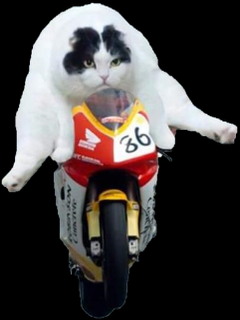

In [11]:
show_pnm('./images/cat.pnm')

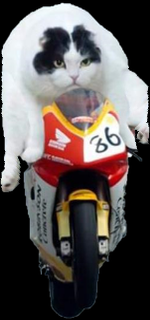

In [12]:
show_pnm('./result/cat_host.pnm')

## Elephant image

In [13]:
!./result/exe/seamCarving ./images/elephant.pnm ./result/elephant 300

Image size (width x height): 787 x 444

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host: 1501.393433 ms

Processing time of device: 540.665100 ms

Error between device result and host result: : 0.000000


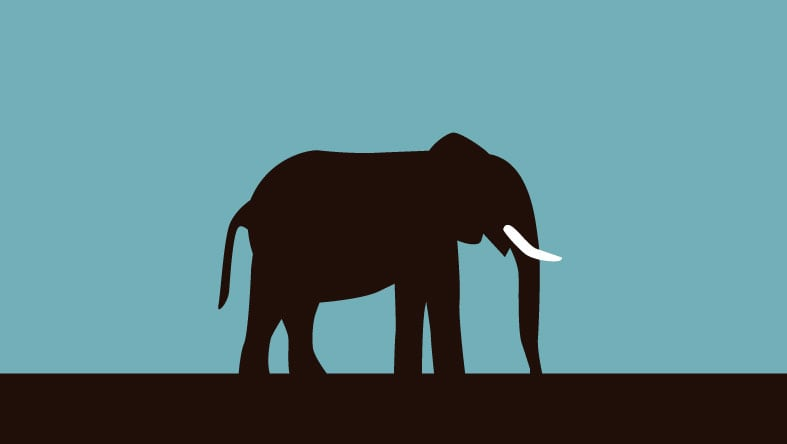

In [14]:
show_pnm('./images/elephant.pnm')

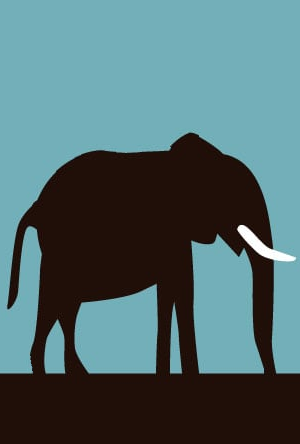

In [15]:
show_pnm('./result/elephant_device.pnm')

## Snail image

In [16]:
!./result/exe/seamCarving ./images/snail.pnm ./result/snail 150

Image size (width x height): 256 x 256

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host: 88.842369 ms

Processing time of device: 31.634209 ms

Error between device result and host result: : 0.000000


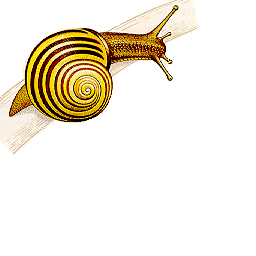

In [17]:
show_pnm('./images/snail.pnm')

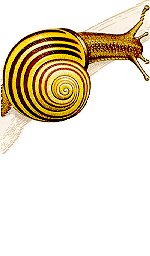

In [18]:
show_pnm('./result/snail_host.pnm')

## Lady image

In [19]:
!./result/exe/seamCarving ./images/lady.pnm ./result/lady 300

Image size (width x height): 512 x 512

_____________GPU info_____________
|Name:                   Tesla T4|
|Compute capability:          7.5|
|Num SMs:                      40|
|Max num threads per SM:     1024|
|Max num warps per SM:         32|
|GMEM:           15835398144 byte|
|SMEM per SM:          65536 byte|
|SMEM per block:       49152 byte|
|________________________________|
Processing time of host: 816.655090 ms

Processing time of device: 259.155975 ms

Error between device result and host result: : 0.873720


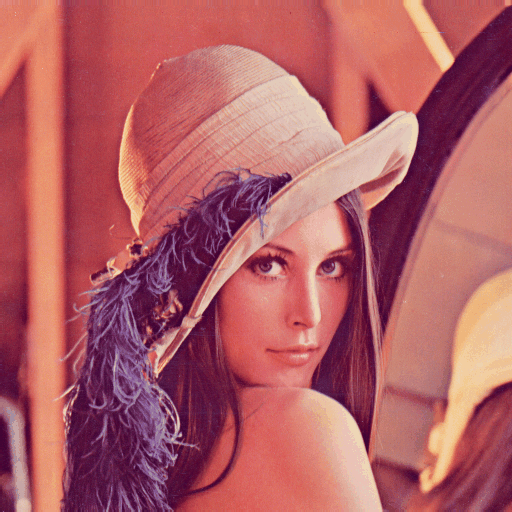

In [20]:
show_pnm('./images/lady.pnm')

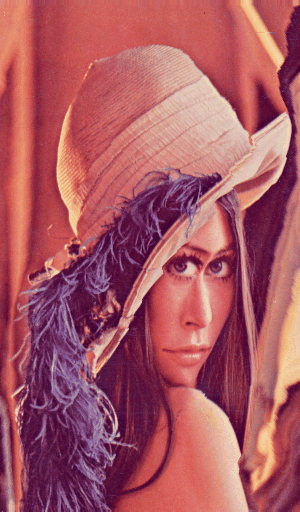

In [21]:
show_pnm('./result/lady_host.pnm')